<a href="https://colab.research.google.com/github/areeba42197/mnistTraining/blob/main/mnistTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Multi-class Classification using Neural Network**





In [ ]:
!pip install tensorflow

**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split ,learning_curve
from sklearn.metrics import mean_squared_error , r2_score

# Neural Networks with TensorFlow/Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Decision Trees and Ensemble Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Regularization
from tensorflow.keras.regularizers import l2

# Visualization for Learning Curves
from sklearn.model_selection import learning_curve




**Load data**

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


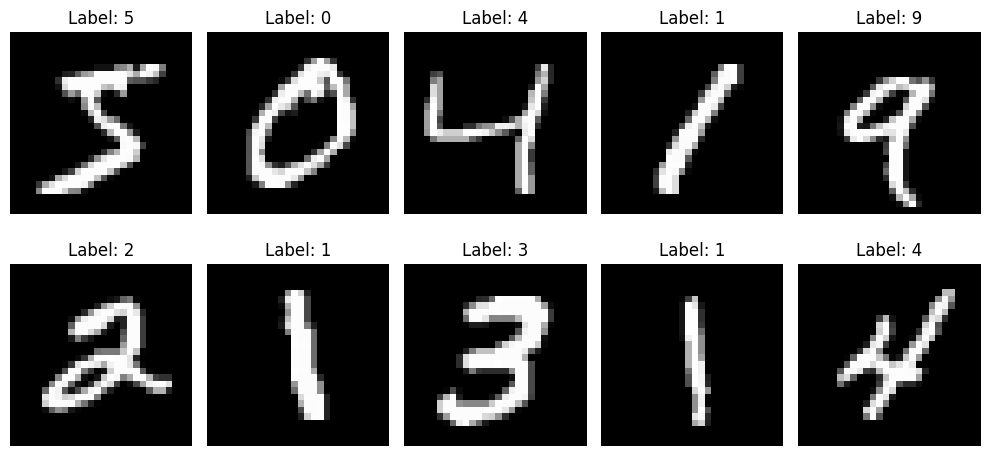

In [ ]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Show shape of the data
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

# Visualize some sample images from the dataset
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
#Normalize
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [ ]:
#flatten
x_train=x_train.reshape(-1, 28*28)
x_test=x_test.reshape(-1,28*28)


In [ ]:
# One-hot encode the labels
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

**Model Training**

In [ ]:
model=Sequential([
    Dense(128, activation='relu' ,input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam' , loss='categorical_crossentropy' , metrics=['accuracy'])

In [ ]:
history=model.fit(x_train, y_train, epochs=10 ,batch_size=120 , verbose=1, validation_split=0.2)

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8049 - loss: 0.6768 - val_accuracy: 0.9528 - val_loss: 0.1730
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9555 - loss: 0.1588 - val_accuracy: 0.9629 - val_loss: 0.1219
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9693 - loss: 0.1003 - val_accuracy: 0.9655 - val_loss: 0.1077
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9766 - loss: 0.0762 - val_accuracy: 0.9698 - val_loss: 0.1044
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9829 - loss: 0.0596 - val_accuracy: 0.9730 - val_loss: 0.0922
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9854 - loss: 0.0468 - val_accuracy: 0.9737 - val_loss: 0.0916
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9899 - loss: 0.0355 - val_accuracy: 0.9746 - val_loss: 0.0858
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9921 - loss: 0.0284 - val_accuracy: 0.

**Visualizing Loss to check overfitting or underfitting**

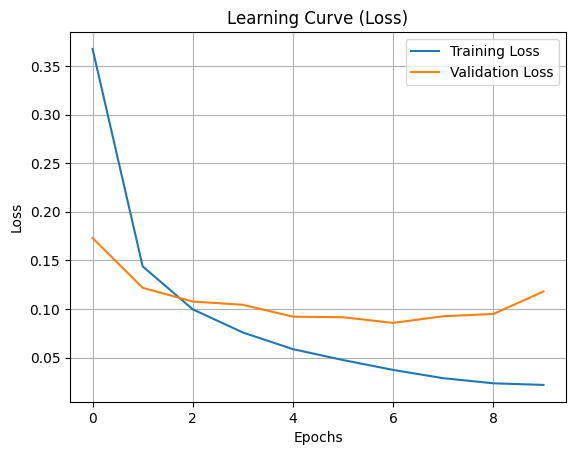

In [ ]:
# Plot learning curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve (Loss)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

**Trained the model with regularization to reduce overfitting**

In [ ]:
# Re-define the model with L2 regularization
model_reg = Sequential([
    Dense(128, activation='relu', input_shape=(784,), kernel_regularizer=l2(0.001)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(10, activation='softmax')
])

model_reg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train again
history_reg = model_reg.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=128,
    verbose=1
)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8105 - loss: 0.9183 - val_accuracy: 0.9467 - val_loss: 0.3583
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9472 - loss: 0.3466 - val_accuracy: 0.9577 - val_loss: 0.2927
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9580 - loss: 0.2793 - val_accuracy: 0.9586 - val_loss: 0.2677
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9657 - loss: 0.2454 - val_accuracy: 0.9661 - val_loss: 0.2352
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9719 - loss: 0.2152 - val_accuracy: 0.9668 - val_loss: 0.2271
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9746 - loss: 0.1979 - val_accuracy: 0.9700 - val_loss: 0.2049
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9757 - loss: 0.1874 - val_accuracy: 0.9737 - val_loss: 0.1928
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9775 - loss: 0.1766 - val_accuracy: 0.

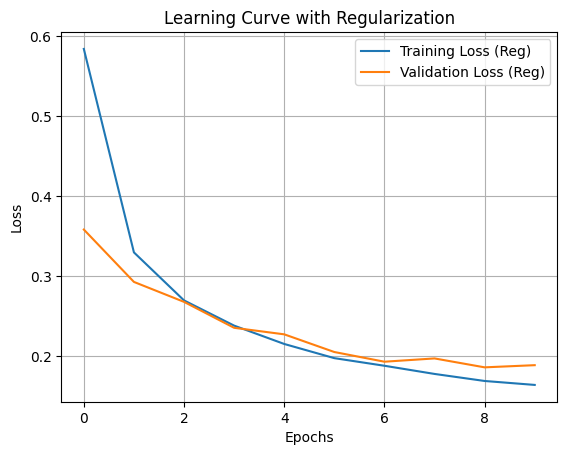

In [ ]:
plt.plot(history_reg.history['loss'], label='Training Loss (Reg)')
plt.plot(history_reg.history['val_loss'], label='Validation Loss (Reg)')
plt.title('Learning Curve with Regularization')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

**Introduced droputs for better model training and to reduce overfitting**

In [ ]:

model = Sequential()

# Flatten the input data
X_train_flat = x_train.reshape(-1, 28*28)

# Input layer with L2 regularization
model.add(Dense(128, activation='relu', input_shape=(X_train_flat.shape[1],), kernel_regularizer=l2(0.001)))

# Dropout layer (drops 20% of the neurons randomly during training)
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))
model.add(Dropout(0.2))


model.add(Dense(10, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_flat, y_train, epochs=18, batch_size=32, validation_split=0.2)

Epoch 1/18
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7746 - loss: 0.9170 - val_accuracy: 0.9446 - val_loss: 0.3484
Epoch 2/18
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9287 - loss: 0.4024 - val_accuracy: 0.9569 - val_loss: 0.2878
Epoch 3/18
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9421 - loss: 0.3408 - val_accuracy: 0.9679 - val_loss: 0.2437
Epoch 4/18
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9489 - loss: 0.3086 - val_accuracy: 0.9671 - val_loss: 0.2431
Epoch 5/18
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9495 - loss: 0.3005 - val_accuracy: 0.9687 - val_loss: 0.2313
Epoch 6/18
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9522 - loss: 0.2876 - val_accuracy: 0.9687 - val_loss: 0.2292
Epoch 7/18
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9569 - loss: 0.2739 - val_accuracy: 0.9655 - val_loss: 0.2344
Epoch 8/18
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9551 - loss: 0.2761 - 

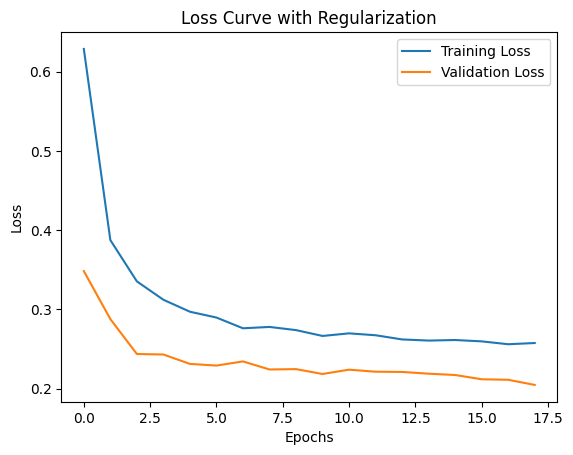

In [ ]:

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve with Regularization')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


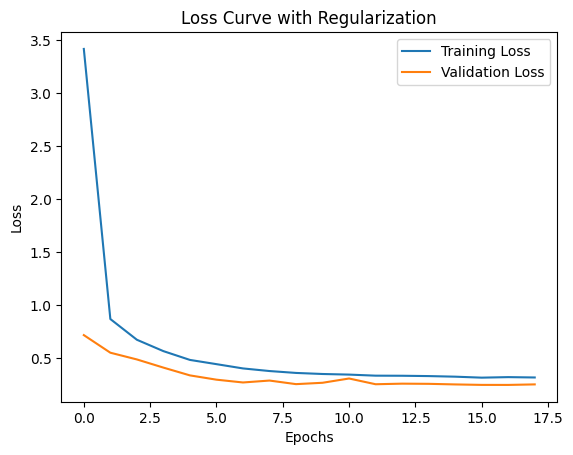

In [ ]:

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve with Regularization')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


The results are good now . There is low bias and low variance

**Decision Tree**


In [ ]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [ ]:
y_pred_dt = clf.predict(x_test)

In [ ]:
from sklearn import metrics

print("\nAccuracy:", metrics.accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred_dt))


Accuracy: 0.8663

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       980
           1       0.95      0.96      0.95      1135
           2       0.85      0.84      0.84      1032
           3       0.82      0.84      0.83      1010
           4       0.86      0.85      0.86       982
           5       0.84      0.80      0.82       892
           6       0.91      0.87      0.89       958
           7       0.90      0.88      0.89      1028
           8       0.80      0.81      0.80       974
           9       0.81      0.86      0.83      1009

    accuracy                           0.87     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.87      0.87     10000



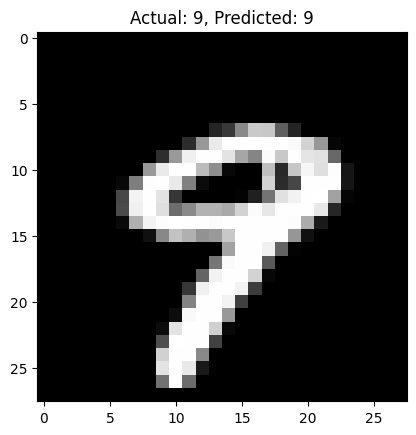

In [ ]:
sample_index = 9
sample_image = x_test[sample_index].reshape(1, -1)
prediction = clf.predict(sample_image)[0]

plt.imshow(x_test[sample_index].reshape(28, 28), cmap='gray')
plt.title(f"Actual: {y_test[sample_index]}, Predicted: {prediction}")
plt.show()


Decision tree with gini

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Store accuracy values
train_accuracies = []
test_accuracies = []
depths = range(1, 31)

# Train decision trees with different max_depth values
for depth in depths:
    clf = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)
    clf.fit(x_train, y_train)

    y_train_pred = clf.predict(x_train)
    y_test_pred = clf.predict(x_test)

    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))




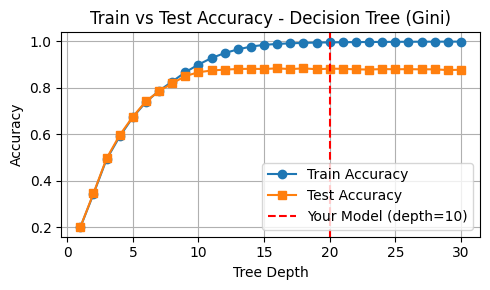

In [ ]:
# Plotting
plt.figure(figsize=(5, 3))
plt.plot(depths, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(depths, test_accuracies, label='Test Accuracy', marker='s')
plt.axvline(x=20, color='r', linestyle='--', label='Your Model (depth=20)')

plt.title('Train vs Test Accuracy - Decision Tree (Gini)')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The model is training well with aprrox 10 depth

**Ensemble methods**


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report

In [ ]:
rf_clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    max_features='sqrt',
    random_state=42 )

rf_clf.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf_clf.predict(x_test)


In [ ]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9704

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



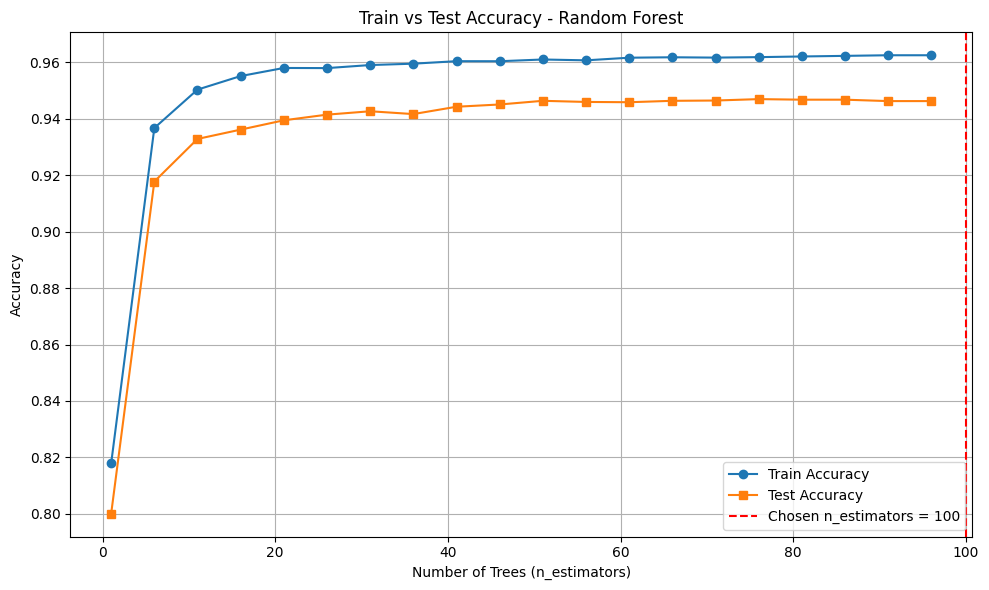

In [ ]:
train_acc = []
test_acc = []
n_estimators_range = range(1, 101, 5)  # Trees from 1 to 100, step 5

for n in n_estimators_range:
    rf = RandomForestClassifier(

        n_estimators=n,
        max_depth=10,                    # limit tree depth
        min_samples_split=5,             # avoid very small branches
        min_samples_leaf=3,              # enforce minimum samples per leaf
        max_features='sqrt',             # good default for classification
        random_state=42,
        n_jobs=-1
    )
    rf.fit(x_train, y_train)
    train_acc.append(accuracy_score(y_train, rf.predict(x_train)))
    test_acc.append(accuracy_score(y_test, rf.predict(x_test)))

# Plotting


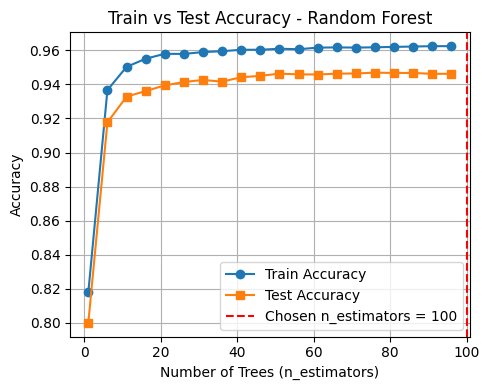

In [ ]:
# Plotting
plt.figure(figsize=(5, 4))
plt.plot(n_estimators_range, train_acc, label='Train Accuracy', marker='o')
plt.plot(n_estimators_range, test_acc, label='Test Accuracy', marker='s')
plt.axvline(x=100, color='red', linestyle='--', label='Chosen n_estimators = 100')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy - Random Forest')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Model is trained well these parameters and difference is low between train and test accuracy

**Random forest with GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:

# Define model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 'log2']
}

# Grid search with 3-fold CV
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf,
                       cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# Train
grid_rf.fit(x_train, y_train)

# Best model evaluation
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(x_test)

# Evaluation
print("Best Random Forest Params:", grid_rf.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Random Forest Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.9704
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



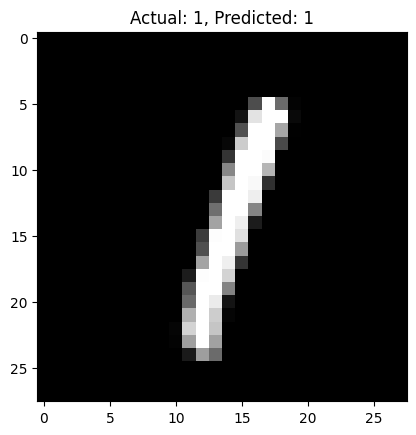

In [ ]:
sample_index = 5
sample_image = x_test[sample_index].reshape(1, -1)
prediction = best_rf.predict(sample_image)[0]

plt.imshow(x_test[sample_index].reshape(28, 28), cmap='gray')
plt.title(f"Actual: {y_test[sample_index]}, Predicted: {prediction}")
plt.show()


In [ ]:
train_acc = []
test_acc = []
n_estimators_range = range(1, 101, 5)

for n in n_estimators_range:
    rf = RandomForestClassifier(

        n_estimators=n,
        max_depth=10,                    # limit tree depth
        min_samples_split=5,             # avoid very small branches
        min_samples_leaf=3,              # enforce minimum samples per leaf
        max_features='sqrt',             # good default for classification
        random_state=42,
        n_jobs=-1
    )
    rf.fit(x_train, y_train)
    train_acc.append(accuracy_score(y_train, rf.predict(x_train)))
    test_acc.append(accuracy_score(y_test, rf.predict(x_test)))




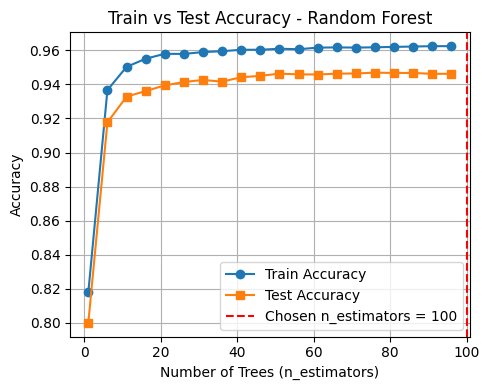

In [ ]:
# Plotting
plt.figure(figsize=(5, 4))
plt.plot(n_estimators_range, train_acc, label='Train Accuracy', marker='o')
plt.plot(n_estimators_range, test_acc, label='Test Accuracy', marker='s')
plt.axvline(x=100, color='red', linestyle='--', label='Chosen n_estimators = 100')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy - Random Forest')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

XG Boost

In [ ]:
pip install xgboost


In [ ]:
import xgboost as xgb

# Initialize and train
xgb_clf = xgb.XGBClassifier(n_estimators=100, max_depth=10, use_label_encoder=False, eval_metric='mlogloss')
xgb_clf.fit(x_train, y_train)

# Predict
y_pred_xgb = xgb_clf.predict(x_test)

# Evaluate
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [09:26:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9756

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
train_acc = []
test_acc = []
n_estimators_range = range(10, 100, 10)

for n in n_estimators_range:
    xgb_clf = xgb.XGBClassifier(
        n_estimators=n,
        max_depth=10,
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=42
    )
    xgb_clf.fit(x_train, y_train)

    # Accuracy
    train_acc.append(accuracy_score(y_train, xgb_clf.predict(x_train)))
    test_acc.append(accuracy_score(y_test, xgb_clf.predict(x_test)))



/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [11:50:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [11:52:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [11:56:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [12:02:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [12:09:34] WARNING: /w

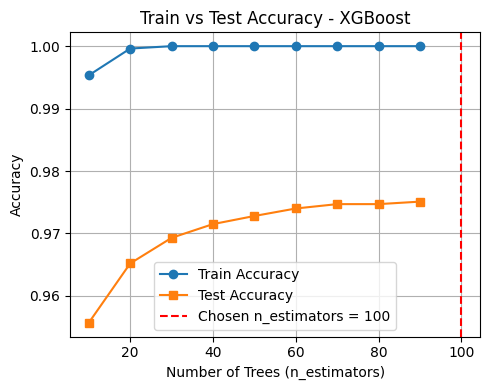

In [ ]:
# Plotting
plt.figure(figsize=(5, 4))
plt.plot(n_estimators_range, train_acc, label='Train Accuracy', marker='o')
plt.plot(n_estimators_range, test_acc, label='Test Accuracy', marker='s')
plt.axvline(x=100, color='red', linestyle='--', label='Chosen n_estimators = 100')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy - XGBoost')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()